In [1]:
import sys
sys.path += ["../24_01_05消息格式转换/"]
from main18_format_transform_weight import main as old_main
from main16_map_visualization2 import visualization
from main19_mph import main


查看结果

In [2]:
def show_map(map):
    N = map.N

    for i in range(N):
        for j in range(N):
            node = map.node_matrix[i][j]
            print(node.distance, end=" ")
        print()

    print("==================================")
    for i in range(N):
        for j in range(N):
            node = map.node_matrix[i][j]
            if node.best_direction == "UP":
                print("↑", end=" ")
            elif node.best_direction == "RIGHT":
                print("→", end=" ")            
            elif node.best_direction == "DOWN":
                print("↓", end=" ")            
            elif node.best_direction == "LEFT":
                print("←", end=" ")
            else:
                print("U", end=" ")
        print()

In [3]:
map_filename = "../24_01_02考虑转弯代价/main15_other_map1.txt"

之前的方法，dijkstra+合并

manhattan_scale 523
1 316
2 -1
3 5319
4 2794
5 3523
6 -1
7 6079
8 4377
9 7562
10 -1
11 2997
12 -1
13 2646
14 -1
15 4977
16 -1
17 -1
18 -1
19 8174
20 -1
21 -1
22 -1
23 6807
24 4253
25 2015
26 9298
27 -1
28 2984
29 -1
30 612
31 3675
20
6 6 4 1 1 4 0 1 5 0 10 2 1 30 3 
7 6 1 0 2 5 
7 4 2 0 3 4 1 11 5 
7 3 2 0 4 2 1 5 4 
7 2 2 0 5 3 1 31 2 
7 1 2 1 3 4 0 6 3 
7 0 1 0 7 3 
5 0 2 1 9 3 0 8 5 
4 0 2 0 9 5 1 26 0 
3 0 1 1 19 5 
6 7 1 0 11 2 
4 7 2 0 12 3 1 13 2 
3 7 2 0 13 3 1 25 4 
2 7 2 1 4 1 0 14 3 
1 7 2 0 15 3 1 28 5 
0 7 1 0 16 3 
0 5 2 0 17 3 1 24 1 
0 4 2 0 18 3 1 8 0 
0 3 2 0 19 1 1 15 3 
0 2 2 1 7 0 0 20 1 
0 1 1 1 23 1 
T1: 5; tmp_cost: 0
T2: 5; tmp_cost: 233
T3: 4; tmp_cost: 324
T4: 2; tmp_cost: 524
T5: 3; tmp_cost: 220
T6: 3; tmp_cost: 0
T7: 3; tmp_cost: 586
T8: 5; tmp_cost: 418
T9: 5; tmp_cost: 0
T10: 2; tmp_cost: 0
T11: 2; tmp_cost: 524
T12: 3; tmp_cost: 220
T13: 3; tmp_cost: 142
T14: 3; tmp_cost: 586
T15: 3; tmp_cost: 0
T16: 3; tmp_cost: 142
T17: 3; tmp_cost: 135
T18: 3; tmp_co

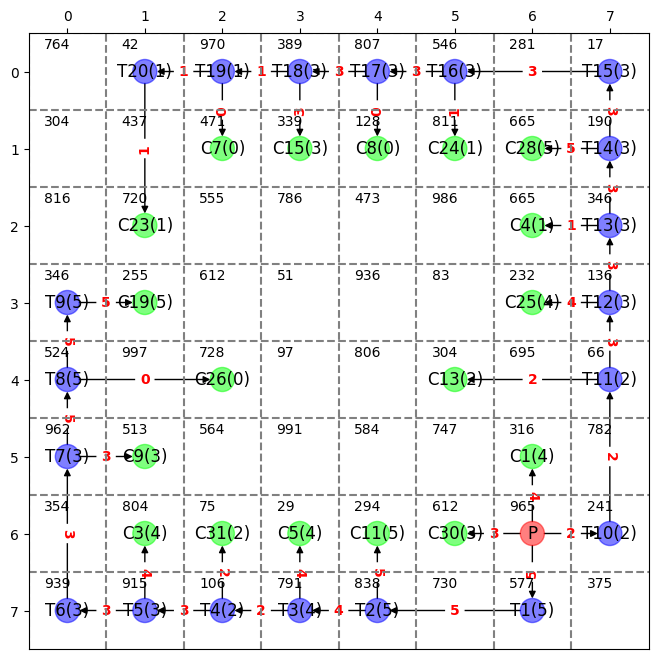

6135 5371 5329 4359 3970 3163 2617 2057 
6670 6087 6079 4977 4377 4253 2984 2040 
7765 6807 -1 -1 -1 -1 2794 1850 
7640 8174 -1 -1 -1 -1 2015 1504 
7294 8570 9298 -1 -1 2646 2342 1368 
6770 7562 -1 -1 -1 -1 316 1302 
5808 5319 3675 3523 2997 612 0 241 
5175 4236 3321 3215 2424 1586 577 895 
→ → → → → → → ↓ 
→ ↑ ↑ ↑ ↑ ↑ → ↓ 
↑ ↑ U U U U → ↓ 
↓ ← U U U U → ↓ 
↓ ← ← U U → → ↓ 
↓ ← U U U U ↓ ↓ 
↓ ↓ ↓ ↓ ↓ → U ← 
→ → → → → → ↑ ↑ 


In [4]:
map, provider, consumer_vector, transmitter_vector = old_main(conf_file=map_filename)
visualization(map, provider, consumer_vector, transmitter_vector)
show_map(map)

新方法，MPH，这里有点问题

manhattan_scale 523
21
6 6 3 1 1 4 1 30 3 0 1 2 
6 7 1 0 2 2 
4 7 2 0 3 3 1 13 2 
3 7 2 1 25 4 0 4 3 
2 7 2 1 4 1 0 5 3 
1 7 2 1 28 5 0 6 3 
0 7 1 0 7 3 
0 5 2 1 24 1 0 8 3 
0 4 2 1 8 0 0 9 3 
0 3 2 1 15 3 0 10 3 
0 2 2 1 7 0 0 11 3 
0 1 1 0 12 3 
1 1 2 1 23 1 0 13 3 
1 0 1 0 14 3 
3 0 2 1 19 5 0 15 3 
4 0 2 0 16 3 1 26 0 
5 0 2 1 9 3 0 17 4 
6 0 2 1 3 4 0 18 2 
7 0 1 0 19 2 
7 2 2 1 31 2 0 20 5 
7 3 2 1 5 4 0 21 5 
7 4 1 1 11 5 
T1: 2; tmp_cost: 0
T2: 2; tmp_cost: 524
T3: 3; tmp_cost: 220
T4: 3; tmp_cost: 142
T5: 3; tmp_cost: 586
T6: 3; tmp_cost: 0
T7: 3; tmp_cost: 142
T8: 3; tmp_cost: 135
T9: 3; tmp_cost: 0
T10: 3; tmp_cost: 135
T11: 3; tmp_cost: 0
T12: 3; tmp_cost: 142
T13: 3; tmp_cost: 0
T14: 3; tmp_cost: 586
T15: 3; tmp_cost: 135
T16: 3; tmp_cost: 220
T17: 4; tmp_cost: 324
T18: 2; tmp_cost: 0
T19: 2; tmp_cost: 79
T20: 5; tmp_cost: 233
T21: 5; tmp_cost: 0
time score: 819.3870967741935
cost score: 234
3187606.596974959


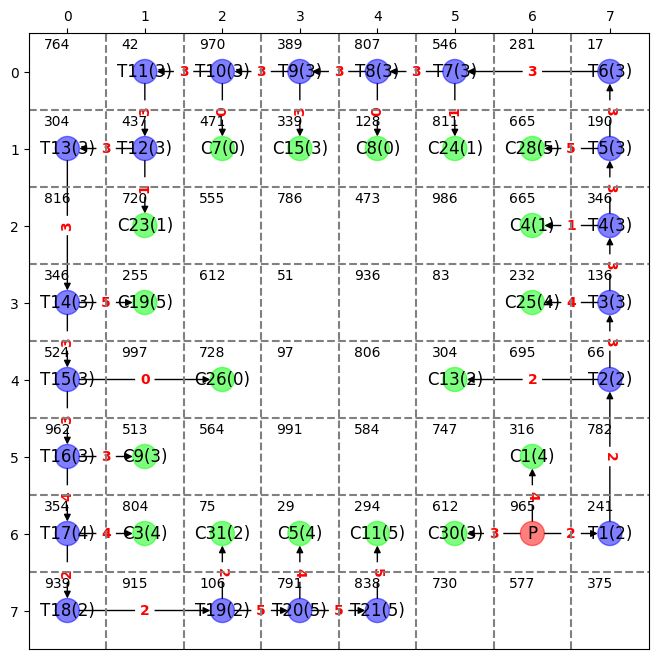

-1 -1 -1 -1 -1 -1 -1 -1 
-1 -1 -1 -1 -1 -1 -1 -1 
-1 -1 -1 -1 -1 -1 -1 -1 
-1 -1 -1 -1 -1 -1 -1 -1 
-1 -1 -1 -1 -1 -1 -1 -1 
-1 -1 -1 -1 -1 -1 -1 -1 
-1 -1 -1 -1 -1 -1 -1 -1 
-1 -1 -1 -1 -1 -1 -1 -1 
U → → → → → → ↓ 
→ ↑ ↑ ↑ ↑ ↑ → ↓ 
↑ ↑ U U U U → ↓ 
↑ ← U U U U → ↓ 
↑ ← ← U U → → ↓ 
↑ ← U U U U ↓ ↓ 
↑ ← ↓ ↓ ↓ → U ← 
↑ ← ← ← ← U U U 


In [5]:
map, provider, consumer_vector, transmitter_vector = main(conf_file=map_filename)
visualization(map, provider, consumer_vector, transmitter_vector)
show_map(map)